In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error
import pickle
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
#calling in necessary datasets
#detailed dataset for year 2019-2022
delivery = pd.read_csv('del_csv.csv')
#summary dataset for year 2019-2022
match = pd.read_csv('Book1.csv')
#detailed dataset for year 2016-2019
delivery_16 = pd.read_csv('1619_csv_01.csv')
#summary dataset for year 2016-2019
match_16= pd.read_csv('new_1619.csv')


In [3]:
delivery = delivery.append(delivery_16, ignore_index=True)

In [4]:
match = match.append(match_16, ignore_index=True) 

In [5]:
delivery.shape

(181538, 24)

In [6]:
delivery.head()

,match_id,season,venue,innings,batting_team,bowling_team,batsman,non_striker,bowler,batsman_run,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs
0,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,1.0,1.0,0.0
1,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1.0,2.0,4.0
2,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,3.0,0.0
3,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,AJ Finch,DA Warner,SL Malinga,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,4.0,1.0
4,1183524.0,2019/20,Adelaide Oval,1.0,Australia,Sri Lanka,DA Warner,AJ Finch,SL Malinga,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,5.0,2.0


In [7]:
match.head()

,match_id,team1,team2,gender,season,date,event,match_number,venue,city,...,toss_decision,player_of_match,umpire,umpire.1,reserve_umpire,tv_umpire,match_referee,result,winner_by_runs,winner_by_wicket
0,1122286,India,South Africa,male,2017/18,43152.0,India tour of South Africa,2,SuperSport Park,Centurion,...,field,H Klaasen,A Paleker,BP Jele,S George,AT Holdstock,AJ Pycroft,South Africa,0,6
1,1145982,Afghanistan,Bangladesh,male,2018,43254.0,Afghanistan tour of India,1,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,field,Rashid Khan,Ahmed Shah Pakteen,Bismillah Shinwari,Mahmood Kharoti,Izatullah Safi,AJ Pycroft,Afghanistan,45,0
2,1183524,Australia,Sri Lanka,male,2019/20,43765.0,Sri Lanka tour of Australia,1,Adelaide Oval,Adelaide,...,field,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,134,0
3,1183525,Australia,Sri Lanka,male,2019/20,43768.0,Sri Lanka tour of Australia,2,"Brisbane Cricket Ground, Woolloongabba",Brisbane,...,bat,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,0,9
4,1183526,Australia,Sri Lanka,male,2019/20,43770.0,Sri Lanka tour of Australia,3,Melbourne Cricket Ground,Melbourne,...,field,DA Warner,P Wilson,SAJ Craig,PJ Gillespie,GA Abood,J Srinath,Australia,0,7


In [8]:
match.shape

(419, 21)

In [9]:
total_score_df = delivery.groupby(['match_id','innings']).sum()['total_runs'].reset_index()

In [10]:
total_score_df = total_score_df[total_score_df['innings'] == 1]

In [11]:
total_score_df

,match_id,innings,total_runs
0,936153.0,1.0,126.0
2,936155.0,1.0,113.0
4,936157.0,1.0,169.0
6,951321.0,1.0,186.0
8,951329.0,1.0,126.0
...,...,...,...
1573,1310162.0,1.0,129.0
1575,1310163.0,1.0,120.0
1577,1310164.0,1.0,78.0
1579,1310165.0,1.0,107.0


In [12]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='match_id',right_on='match_id')

In [13]:
match_df

,match_id,team1,team2,gender,season,date,event,match_number,venue,city,...,player_of_match,umpire,umpire.1,reserve_umpire,tv_umpire,match_referee,result,winner_by_runs,winner_by_wicket,total_runs
0,1122286,India,South Africa,male,2017/18,43152.0,India tour of South Africa,2,SuperSport Park,Centurion,...,H Klaasen,A Paleker,BP Jele,S George,AT Holdstock,AJ Pycroft,South Africa,0,6,188.0
1,1122286,India,South Africa,male,2017/18,43152.0,India tour of South Africa,2,SuperSport Park,Centurion,...,H Klaasen,A Paleker,BP Jele,S George,AT Holdstock,AJ Pycroft,South Africa,0,6,188.0
2,1145982,Afghanistan,Bangladesh,male,2018,43254.0,Afghanistan tour of India,1,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,Rashid Khan,Ahmed Shah Pakteen,Bismillah Shinwari,Mahmood Kharoti,Izatullah Safi,AJ Pycroft,Afghanistan,45,0,167.0
3,1145982,Afghanistan,Bangladesh,male,2018,43254.0,Afghanistan tour of India,1,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,Rashid Khan,Ahmed Shah Pakteen,Bismillah Shinwari,Mahmood Kharoti,Izatullah Safi,AJ Pycroft,Afghanistan,45,0,167.0
4,1183524,Australia,Sri Lanka,male,2019/20,43765.0,Sri Lanka tour of Australia,1,Adelaide Oval,Adelaide,...,DA Warner,P Wilson,GA Abood,PJ Gillespie,SAJ Craig,J Srinath,Australia,134,0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1168114,Afghanistan,Ireland,male,2018/19,43520.0,Ireland tour of India,3,"Rajiv Gandhi International Cricket Stadium, De...",Dehra Dun,...,Mohammad Nabi,Ahmed Shah Durrani,Izatullah Safi,Bismillah Shinwari,Ahmed Shah Pakteen,J Srinath,Afghanistan,32,0,210.0
413,1168247,India,Australia,male,2018/19,43520.0,Australia tour of India,1,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Visakhapatnam,...,NM Coulter-Nile,C Shamshuddin,Nitin Menon,CK Nandan,AK Chaudhary,RS Madugalle,Australia,0,3,126.0
414,1168248,India,Australia,male,2018/19,43523.0,Australia tour of India,2,M.Chinnaswamy Stadium,Bengaluru,...,GJ Maxwell,AK Chaudhary,CK Nandan,C Shamshuddin,Nitin Menon,RS Madugalle,Australia,0,7,190.0
415,1168522,Ireland,Zimbabwe,male,2019,43660.0,Ireland v Zimbabwe,3,Bready,Derry,...,R Black,AJ Neill,M Hawthorne,JJ Crowe,0,0,Zimbabwe,0,8,171.0


In [14]:
match_df['team1'].unique()

array(['India', 'Afghanistan', 'Australia', 'South Africa', 'New Zealand',
       'Netherlands', 'West Indies', 'Sri Lanka', 'Bangladesh', 'Ireland',
       'Oman', 'England', 'Pakistan', 'Scotland', 'Hong Kong',
       'United Arab Emirates', 'Zimbabwe', 'Namibia', 'Nepal'],
      dtype=object)

In [15]:
teams = [
    'Australia', 'South Africa', 'India', 'New Zealand',
       'West Indies', 'Sri Lanka',
       'Afghanistan', 'Bangladesh', 'Ireland',  'England',
       'Pakistan','Zimbabwe'
]

In [16]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [17]:
match_df.shape

(369, 22)

In [18]:
match_df = match_df[['match_id','city','result','total_runs']]

In [19]:
delivery_df = match_df.merge(delivery,on='match_id')

In [20]:
delivery_df = delivery_df[delivery_df['innings'] == 2]

#  1ST INNNINGS PREDICTIONS

In [21]:
delivery_df_2 = match_df.merge(delivery,on='match_id')

In [22]:
delivery_df_2 = delivery_df_2[delivery_df_2['innings'] == 1]

In [23]:
delivery_df_2

,match_id,city,result,total_runs_x,season,venue,innings,batting_team,bowling_team,batsman,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,ball,Over,Ball,total_runs_y
0,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,1.0,India,South Africa,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,1.0,1.0,0.0
1,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,1.0,India,South Africa,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1.0,2.0,0.0
2,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,1.0,India,South Africa,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,3.0,0.0
3,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,1.0,India,South Africa,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.0,4.0,0.0
4,1122286,Centurion,South Africa,188.0,2017/18,SuperSport Park,1.0,India,South Africa,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86765,1119544,Cardiff,England,148.0,2018,Sophia Gardens,1.0,India,England,MS Dhoni,...,NaN,NaN,NaN,NaN,NaN,NaN,19.4,20.0,4.0,1.0
86766,1119544,Cardiff,England,148.0,2018,Sophia Gardens,1.0,India,England,HH Pandya,...,NaN,NaN,NaN,NaN,NaN,NaN,19.5,20.0,5.0,5.0
86767,1119544,Cardiff,England,148.0,2018,Sophia Gardens,1.0,India,England,HH Pandya,...,NaN,NaN,NaN,NaN,NaN,NaN,19.6,20.0,6.0,1.0
86768,1119544,Cardiff,England,148.0,2018,Sophia Gardens,1.0,India,England,MS Dhoni,...,NaN,NaN,NaN,NaN,NaN,NaN,19.7,20.0,7.0,4.0


In [24]:
delivery_df_2 = delivery_df_2[['match_id','batting_team','bowling_team','ball','venue','player_dismissed','total_runs_y']]

In [25]:
delivery_df_2

,match_id,batting_team,bowling_team,ball,venue,player_dismissed,total_runs_y
0,1122286,India,South Africa,0.1,SuperSport Park,NaN,0.0
1,1122286,India,South Africa,0.2,SuperSport Park,NaN,0.0
2,1122286,India,South Africa,0.3,SuperSport Park,NaN,0.0
3,1122286,India,South Africa,0.4,SuperSport Park,NaN,0.0
4,1122286,India,South Africa,0.5,SuperSport Park,NaN,0.0
...,...,...,...,...,...,...,...
86765,1119544,India,England,19.4,Sophia Gardens,NaN,1.0
86766,1119544,India,England,19.5,Sophia Gardens,NaN,5.0
86767,1119544,India,England,19.6,Sophia Gardens,NaN,1.0
86768,1119544,India,England,19.7,Sophia Gardens,NaN,4.0


In [26]:
delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].replace(np.nan, 0)

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/91425804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].replace(np.nan, 0)


In [27]:
delivery_df_2['venue'].value_counts()

Shere Bangla National Stadium, Mirpur     2812
Dubai International Cricket Stadium       2010
Harare Sports Club                        1974
Eden Park                                 1246
R.Premadasa Stadium, Khettarama           1225
                                          ... 
St George's Park                           121
Bready                                     121
New Wanderers Stadium                      120
Brisbane Cricket Ground, Woolloongabba     117
Carrara Oval                                64
Name: venue, Length: 107, dtype: int64

In [28]:
#eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [29]:
q2 = delivery_df_2

In [30]:
q2['current_score'] = q2.groupby('match_id').cumsum()['total_runs_y']

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/1753137334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['current_score'] = q2.groupby('match_id').cumsum()['total_runs_y']


In [31]:
q2['over'] = q2['ball'].apply(lambda x:str(x).split(".")[0])
q2['ball_no'] = q2['ball'].apply(lambda x:str(x).split(".")[1])
q2

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/1809179651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['over'] = q2['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/1809179651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['ball_no'] = q2['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,venue,player_dismissed,total_runs_y,current_score,over,ball_no
0,1122286,India,South Africa,0.1,SuperSport Park,0,0.0,0.0,0,1
1,1122286,India,South Africa,0.2,SuperSport Park,0,0.0,0.0,0,2
2,1122286,India,South Africa,0.3,SuperSport Park,0,0.0,0.0,0,3
3,1122286,India,South Africa,0.4,SuperSport Park,0,0.0,0.0,0,4
4,1122286,India,South Africa,0.5,SuperSport Park,0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...
86765,1119544,India,England,19.4,Sophia Gardens,0,1.0,134.0,19,4
86766,1119544,India,England,19.5,Sophia Gardens,0,5.0,139.0,19,5
86767,1119544,India,England,19.6,Sophia Gardens,0,1.0,140.0,19,6
86768,1119544,India,England,19.7,Sophia Gardens,0,4.0,144.0,19,7


In [32]:
q2['balls_bowled'] = (q2['over'].astype('int')*6) + q2['ball_no'].astype('int')
#q2

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/1914849155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['balls_bowled'] = (q2['over'].astype('int')*6) + q2['ball_no'].astype('int')


In [33]:
q2['balls_left'] = 120 - q2['balls_bowled']
q2['balls_left'] = q2['balls_left'].apply(lambda x:0 if x<0 else x)
#q2

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/4294459142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['balls_left'] = 120 - q2['balls_bowled']
C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/4294459142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['balls_left'] = q2['balls_left'].apply(lambda x:0 if x<0 else x)


In [34]:
q2['player_dismissed'] = q2['player_dismissed'].apply(lambda x:0 if x==0  else 1)
q2['player_dismissed'] = q2['player_dismissed'].astype('int')
q2['player_dismissed'] = q2.groupby('match_id').cumsum()['player_dismissed']
q2['wickets_left'] = 10 - q2['player_dismissed']

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/1944697670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['player_dismissed'] = q2['player_dismissed'].apply(lambda x:0 if x==0  else 1)
C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/1944697670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['player_dismissed'] = q2['player_dismissed'].astype('int')
C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/1944697670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [35]:
q2.tail(30)

,match_id,batting_team,bowling_team,ball,venue,player_dismissed,total_runs_y,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
86740,1119544,India,England,15.3,Sophia Gardens,4,2.0,97.0,15,3,93,27,6
86741,1119544,India,England,15.4,Sophia Gardens,4,1.0,98.0,15,4,94,26,6
86742,1119544,India,England,15.5,Sophia Gardens,4,1.0,99.0,15,5,95,25,6
86743,1119544,India,England,15.6,Sophia Gardens,4,2.0,101.0,15,6,96,24,6
86744,1119544,India,England,16.1,Sophia Gardens,4,1.0,102.0,16,1,97,23,6
86745,1119544,India,England,16.2,Sophia Gardens,4,1.0,103.0,16,2,98,22,6
86746,1119544,India,England,16.3,Sophia Gardens,4,1.0,104.0,16,3,99,21,6
86747,1119544,India,England,16.4,Sophia Gardens,4,6.0,110.0,16,4,100,20,6
86748,1119544,India,England,16.5,Sophia Gardens,4,1.0,111.0,16,5,101,19,6
86749,1119544,India,England,16.6,Sophia Gardens,4,0.0,111.0,16,6,102,18,6


In [36]:
q2['crr'] = (q2['current_score']*6)/q2['balls_bowled']
q2

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/4068225706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['crr'] = (q2['current_score']*6)/q2['balls_bowled']


,match_id,batting_team,bowling_team,ball,venue,player_dismissed,total_runs_y,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,1122286,India,South Africa,0.1,SuperSport Park,0,0.0,0.0,0,1,1,119,10,0.000000
1,1122286,India,South Africa,0.2,SuperSport Park,0,0.0,0.0,0,2,2,118,10,0.000000
2,1122286,India,South Africa,0.3,SuperSport Park,0,0.0,0.0,0,3,3,117,10,0.000000
3,1122286,India,South Africa,0.4,SuperSport Park,0,0.0,0.0,0,4,4,116,10,0.000000
4,1122286,India,South Africa,0.5,SuperSport Park,0,0.0,0.0,0,5,5,115,10,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86765,1119544,India,England,19.4,Sophia Gardens,5,1.0,134.0,19,4,118,2,5,6.813559
86766,1119544,India,England,19.5,Sophia Gardens,5,5.0,139.0,19,5,119,1,5,7.008403
86767,1119544,India,England,19.6,Sophia Gardens,5,1.0,140.0,19,6,120,0,5,7.000000
86768,1119544,India,England,19.7,Sophia Gardens,5,4.0,144.0,19,7,121,0,5,7.140496


In [37]:
groups = q2.groupby('match_id')

match_ids = q2['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['total_runs_y'].values.tolist())

In [38]:
q2['last_five'] = last_five

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/2545006184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['last_five'] = last_five


In [39]:
final_q2 = q2.groupby('match_id').sum()['total_runs_y'].reset_index().merge(q2,on='match_id')

In [40]:
final_q2

,match_id,total_runs_y_x,batting_team,bowling_team,ball,venue,player_dismissed,total_runs_y_y,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,936153,126.0,South Africa,Sri Lanka,0.1,SuperSport Park,0,1.0,1.0,0,1,1,119,10,6.000000,NaN
1,936153,126.0,South Africa,Sri Lanka,0.2,SuperSport Park,0,4.0,5.0,0,2,2,118,10,15.000000,NaN
2,936153,126.0,South Africa,Sri Lanka,0.3,SuperSport Park,0,1.0,6.0,0,3,3,117,10,12.000000,NaN
3,936153,126.0,South Africa,Sri Lanka,0.4,SuperSport Park,0,1.0,7.0,0,4,4,116,10,10.500000,NaN
4,936153,126.0,South Africa,Sri Lanka,0.5,SuperSport Park,0,1.0,8.0,0,5,5,115,10,9.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45179,1299833,115.0,Bangladesh,Afghanistan,19.2,"Shere Bangla National Stadium, Mirpur",9,1.0,111.0,19,2,116,4,1,5.741379,24.0
45180,1299833,115.0,Bangladesh,Afghanistan,19.3,"Shere Bangla National Stadium, Mirpur",9,0.0,111.0,19,3,117,3,1,5.692308,23.0
45181,1299833,115.0,Bangladesh,Afghanistan,19.4,"Shere Bangla National Stadium, Mirpur",9,0.0,111.0,19,4,118,2,1,5.644068,23.0
45182,1299833,115.0,Bangladesh,Afghanistan,19.5,"Shere Bangla National Stadium, Mirpur",9,1.0,112.0,19,5,119,1,1,5.647059,24.0


In [41]:
final_q2.rename(columns = {'total_runs_y_x':'total_score'}, inplace = True)
final_q2.rename(columns = {'total_runs_y_y':'run_scored'}, inplace = True)

In [42]:
final_q2

,match_id,total_score,batting_team,bowling_team,ball,venue,player_dismissed,run_scored,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,936153,126.0,South Africa,Sri Lanka,0.1,SuperSport Park,0,1.0,1.0,0,1,1,119,10,6.000000,NaN
1,936153,126.0,South Africa,Sri Lanka,0.2,SuperSport Park,0,4.0,5.0,0,2,2,118,10,15.000000,NaN
2,936153,126.0,South Africa,Sri Lanka,0.3,SuperSport Park,0,1.0,6.0,0,3,3,117,10,12.000000,NaN
3,936153,126.0,South Africa,Sri Lanka,0.4,SuperSport Park,0,1.0,7.0,0,4,4,116,10,10.500000,NaN
4,936153,126.0,South Africa,Sri Lanka,0.5,SuperSport Park,0,1.0,8.0,0,5,5,115,10,9.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45179,1299833,115.0,Bangladesh,Afghanistan,19.2,"Shere Bangla National Stadium, Mirpur",9,1.0,111.0,19,2,116,4,1,5.741379,24.0
45180,1299833,115.0,Bangladesh,Afghanistan,19.3,"Shere Bangla National Stadium, Mirpur",9,0.0,111.0,19,3,117,3,1,5.692308,23.0
45181,1299833,115.0,Bangladesh,Afghanistan,19.4,"Shere Bangla National Stadium, Mirpur",9,0.0,111.0,19,4,118,2,1,5.644068,23.0
45182,1299833,115.0,Bangladesh,Afghanistan,19.5,"Shere Bangla National Stadium, Mirpur",9,1.0,112.0,19,5,119,1,1,5.647059,24.0


In [43]:
final_q3=final_q2[['batting_team','bowling_team','venue','current_score','balls_left','wickets_left','crr','last_five','total_score']]

In [44]:
final_q3.dropna(inplace=True)

C:\Users\Parth Shah 7\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [45]:
final_q3.isnull().sum()

batting_team     0
bowling_team     0
venue            0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
total_score      0
dtype: int64

In [46]:
final_q3 = final_q3.sample(final_q3.shape[0])

In [47]:
final_q3.sample(2)

,batting_team,bowling_team,venue,current_score,balls_left,wickets_left,crr,last_five,total_score
44854,Pakistan,Australia,"Gaddafi Stadium, Lahore",61.0,82,10,9.631579,47.0,162.0
7162,South Africa,Bangladesh,Mangaung Oval,103.0,52,8,9.088235,37.0,195.0


In [48]:
X = final_q3.drop(columns=['total_score'])
y = final_q3['total_score']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [49]:
X_train

,batting_team,bowling_team,venue,current_score,balls_left,wickets_left,crr,last_five
18056,Pakistan,New Zealand,Dubai International Cricket Stadium,88.0,44,9,6.947368,45.0
41454,Australia,England,Dubai International Cricket Stadium,67.0,30,5,4.466667,25.0
42602,England,New Zealand,"Zayed Cricket Stadium, Abu Dhabi",43.0,80,9,6.450000,35.0
26479,Ireland,West Indies,"National Cricket Stadium, Grenada",157.0,36,8,11.214286,32.0
5916,West Indies,India,Central Broward Regional Park Stadium Turf Ground,78.0,84,10,13.000000,61.0
...,...,...,...,...,...,...,...,...
1629,Bangladesh,Australia,M Chinnaswamy Stadium,104.0,30,6,6.933333,40.0
43937,India,West Indies,"Eden Gardens, Kolkata",180.0,5,6,9.391304,64.0
28482,Zimbabwe,Pakistan,Rawalpindi Cricket Stadium,120.0,11,2,6.605505,42.0
670,England,West Indies,Wankhede Stadium,142.0,18,7,8.352941,46.0


In [50]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','venue'])
]
,remainder='passthrough')

In [51]:
    pipe = Pipeline(steps=[
   ('step1',trf),
  ('step2',StandardScaler()),
 ('step3',LinearRegression())
])

In [52]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [53]:
#mape(y_test,y_pred)

In [54]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("LinearRegression Model: \n")
print(r2_score(y_test,y_pred))
print("r2_score \n")
print(mean_absolute_error(y_test,y_pred))
print("mean_absolute_error (MAE) \n")
print(mape(y_test,y_pred))
print("mean_absolute_percentage_error (MAPE) \n")
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
#mape, mean_abs_perc_er, mae , 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

LinearRegression Model: 

0.79499864495374
r2_score 

14.55355597464159
mean_absolute_error (MAE) 

9.330706247359911
mean_absolute_percentage_error (MAPE) 

Root Mean Square Error:

20.68622792292391


In [55]:

MSE = np.square(np.subtract(y_test,y_pred)).mean() 
#mape, mean_abs_perc_er, mae , 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
#print("Mean Square Error:\n")
#print(MSE)

Root Mean Square Error:

20.68622792292391


In [56]:
ran = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',RandomForestRegressor(max_depth=10,random_state=2))
])

In [57]:
ran.fit(X_train,y_train)
y_pred = ran.predict(X_test)
#print(r2_score(y_test,y_pred))
#print(mean_absolute_error(y_test,y_pred))
print("RandomForestRegressor Model: \n")
print(r2_score(y_test,y_pred))
print("r2_score \n")
print(mean_absolute_error(y_test,y_pred))
print("mean_absolute_error (MAE) \n")
print(mape(y_test,y_pred))
print("mean_absolute_percentage_error (MAPE) \n")
from sklearn.metrics import mean_squared_error
import math
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
#mape, mean_abs_perc_er, mae , 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

RandomForestRegressor Model: 

0.881045797697702
r2_score 

11.371632260620663
mean_absolute_error (MAE) 

7.385355223886732
mean_absolute_percentage_error (MAPE) 

Root Mean Square Error:

15.757700222032184


In [58]:
from sklearn.metrics import mean_squared_error
import math
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
#print("Mean Square Error:\n")
#print(MSE)

Root Mean Square Error:

15.757700222032184


In [59]:
xgb = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.3,max_depth=12,random_state=1))
])

In [60]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
#print(r2_score(y_test,y_pred))
#print(mean_absolute_error(y_test,y_pred))
print("XGBRegressor Model: \n")
print(r2_score(y_test,y_pred))
print("r2_score \n")
print(mean_absolute_error(y_test,y_pred))
print("mean_absolute_error (MAE) \n")
print(mape(y_test,y_pred))
print("mean_absolute_percentage_error (MAPE) \n")
from sklearn.metrics import mean_squared_error
import math
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
#mape, mean_abs_perc_er, mae , 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

XGBRegressor Model: 

0.9923684291416885
r2_score 

1.5217682554513225
mean_absolute_error (MAE) 

0.9800931455517498
mean_absolute_percentage_error (MAPE) 

Root Mean Square Error:

3.991258992991629


In [61]:
y_pred

array([140.61661, 166.5703 , 162.84477, ..., 200.80717, 189.50279,
       125.8737 ], dtype=float32)

In [62]:
y_test

40600    143.0
25080    162.0
15496    164.0
17199    212.0
21435    153.0
         ...  
24733    175.0
25449    131.0
26324    201.0
8399     190.0
481      126.0
Name: total_score, Length: 6926, dtype: float64

In [90]:
y_pred = ran.predict(X_test)[0]
y_pred

149.62077314359817

In [91]:
y_pred = ran.predict(X_test)[0]
y_pred

149.62077314359817

In [92]:
mat = final_q2[final_q2['match_id'] == 1183524]
#mat = mat[(mat['ball_no'] == 6)]
#mat.head(2)
temp_df = mat[['batting_team','bowling_team','venue','current_score','balls_left','wickets_left','crr','last_five']].dropna()
temp_df
#temp_df = temp_df[temp_df['balls_left'] != 0]
#result = pipe.predict(temp_df)
#result

,batting_team,bowling_team,venue,current_score,balls_left,wickets_left,crr,last_five
19597,Australia,Sri Lanka,Adelaide Oval,48.0,91,10,9.931034,48.0
19598,Australia,Sri Lanka,Adelaide Oval,52.0,90,10,10.400000,52.0
19599,Australia,Sri Lanka,Adelaide Oval,52.0,89,10,10.064516,48.0
19600,Australia,Sri Lanka,Adelaide Oval,53.0,89,10,10.258065,49.0
19601,Australia,Sri Lanka,Adelaide Oval,54.0,88,10,10.125000,49.0
...,...,...,...,...,...,...,...,...
19688,Australia,Sri Lanka,Adelaide Oval,229.0,3,9,11.743590,57.0
19689,Australia,Sri Lanka,Adelaide Oval,229.0,2,8,11.644068,57.0
19690,Australia,Sri Lanka,Adelaide Oval,230.0,1,8,11.596639,54.0
19691,Australia,Sri Lanka,Adelaide Oval,232.0,0,8,11.600000,54.0


In [93]:
temp_df = temp_df[temp_df['balls_left'] != 0]
result = ran.predict(temp_df)
result

array([200.13982653, 201.12093419, 200.56233338, 200.89273742,
       200.56233338, 199.91549353, 193.57731802, 185.22532885,
       185.22532885, 185.22532885, 185.78461598, 185.06733882,
       184.89767873, 183.14099541, 184.89767873, 184.89767873,
       185.0312831 , 183.39546035, 186.5040888 , 201.05035317,
       201.05035317, 200.09673619, 196.13605448, 186.83246052,
       200.75023539, 198.02368408, 187.82641103, 196.86588827,
       202.51856688, 202.74004881, 205.41737458, 206.2850074 ,
       208.41446853, 215.05670496, 218.10924224, 215.70819215,
       222.59315378, 211.94364777, 211.2649357 , 210.97502047,
       211.5603459 , 211.4211344 , 211.4211344 , 210.89799421,
       210.72483729, 210.72483729, 214.27796493, 215.26092796,
       215.2347242 , 213.50019975, 214.14749282, 214.88330581,
       217.17678373, 227.04022658, 224.81244774, 230.10542439,
       230.46164864, 230.07476673, 229.77072634, 230.46164864,
       230.07476673, 229.77072634, 225.69454548, 226.90

In [94]:
dv = pd.DataFrame(result)
dv

,0
0,200.139827
1,201.120934
2,200.562333
3,200.892737
4,200.562333
...,...
89,235.441438
90,235.906687
91,235.822111
92,235.518942


In [95]:
temp_df['predicted'] = np.round(result)
temp_df

C:\Users\PARTHS~1\AppData\Local\Temp/ipykernel_13044/1329957812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['predicted'] = np.round(result)


,batting_team,bowling_team,venue,current_score,balls_left,wickets_left,crr,last_five,predicted
19597,Australia,Sri Lanka,Adelaide Oval,48.0,91,10,9.931034,48.0,200.0
19598,Australia,Sri Lanka,Adelaide Oval,52.0,90,10,10.400000,52.0,201.0
19599,Australia,Sri Lanka,Adelaide Oval,52.0,89,10,10.064516,48.0,201.0
19600,Australia,Sri Lanka,Adelaide Oval,53.0,89,10,10.258065,49.0,201.0
19601,Australia,Sri Lanka,Adelaide Oval,54.0,88,10,10.125000,49.0,201.0
...,...,...,...,...,...,...,...,...,...
19686,Australia,Sri Lanka,Adelaide Oval,224.0,5,9,11.686957,54.0,235.0
19687,Australia,Sri Lanka,Adelaide Oval,228.0,4,9,11.793103,57.0,236.0
19688,Australia,Sri Lanka,Adelaide Oval,229.0,3,9,11.743590,57.0,236.0
19689,Australia,Sri Lanka,Adelaide Oval,229.0,2,8,11.644068,57.0,236.0


In [96]:
def match_progression(x_q2,match_id,pipe):
    match = x_q2[x_q2['match_id'] == match_id]
    temp_df = match[['batting_team','bowling_team','venue','current_score','balls_left','wickets_left','crr','last_five']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = ran.predict(temp_df)
    temp_df['predicted_total'] = np.round(result)
    prediction = temp_df
    return prediction

In [97]:
prediction = match_progression(final_q2,1183524,pipe)
#prediction.tail(70:30)

In [98]:
prediction

,batting_team,bowling_team,venue,current_score,balls_left,wickets_left,crr,last_five,predicted_total
19597,Australia,Sri Lanka,Adelaide Oval,48.0,91,10,9.931034,48.0,200.0
19598,Australia,Sri Lanka,Adelaide Oval,52.0,90,10,10.400000,52.0,201.0
19599,Australia,Sri Lanka,Adelaide Oval,52.0,89,10,10.064516,48.0,201.0
19600,Australia,Sri Lanka,Adelaide Oval,53.0,89,10,10.258065,49.0,201.0
19601,Australia,Sri Lanka,Adelaide Oval,54.0,88,10,10.125000,49.0,201.0
...,...,...,...,...,...,...,...,...,...
19686,Australia,Sri Lanka,Adelaide Oval,224.0,5,9,11.686957,54.0,235.0
19687,Australia,Sri Lanka,Adelaide Oval,228.0,4,9,11.793103,57.0,236.0
19688,Australia,Sri Lanka,Adelaide Oval,229.0,3,9,11.743590,57.0,236.0
19689,Australia,Sri Lanka,Adelaide Oval,229.0,2,8,11.644068,57.0,236.0


In [99]:
prediction.tail(25)

,batting_team,bowling_team,venue,current_score,balls_left,wickets_left,crr,last_five,predicted_total
19666,Australia,Sri Lanka,Adelaide Oval,184.0,25,9,11.621053,60.0,226.0
19667,Australia,Sri Lanka,Adelaide Oval,185.0,24,9,11.562500,60.0,225.0
19668,Australia,Sri Lanka,Adelaide Oval,187.0,23,9,11.567010,62.0,228.0
19669,Australia,Sri Lanka,Adelaide Oval,191.0,22,9,11.693878,65.0,230.0
19670,Australia,Sri Lanka,Adelaide Oval,191.0,21,9,11.575758,64.0,229.0
19671,Australia,Sri Lanka,Adelaide Oval,192.0,20,9,11.520000,64.0,228.0
19672,Australia,Sri Lanka,Adelaide Oval,194.0,19,9,11.524752,64.0,228.0
19673,Australia,Sri Lanka,Adelaide Oval,198.0,18,9,11.647059,64.0,230.0
19674,Australia,Sri Lanka,Adelaide Oval,198.0,17,9,11.533981,60.0,225.0
19675,Australia,Sri Lanka,Adelaide Oval,199.0,16,9,11.480769,60.0,224.0


(91.0, 1.0, 183.0, 236.0)

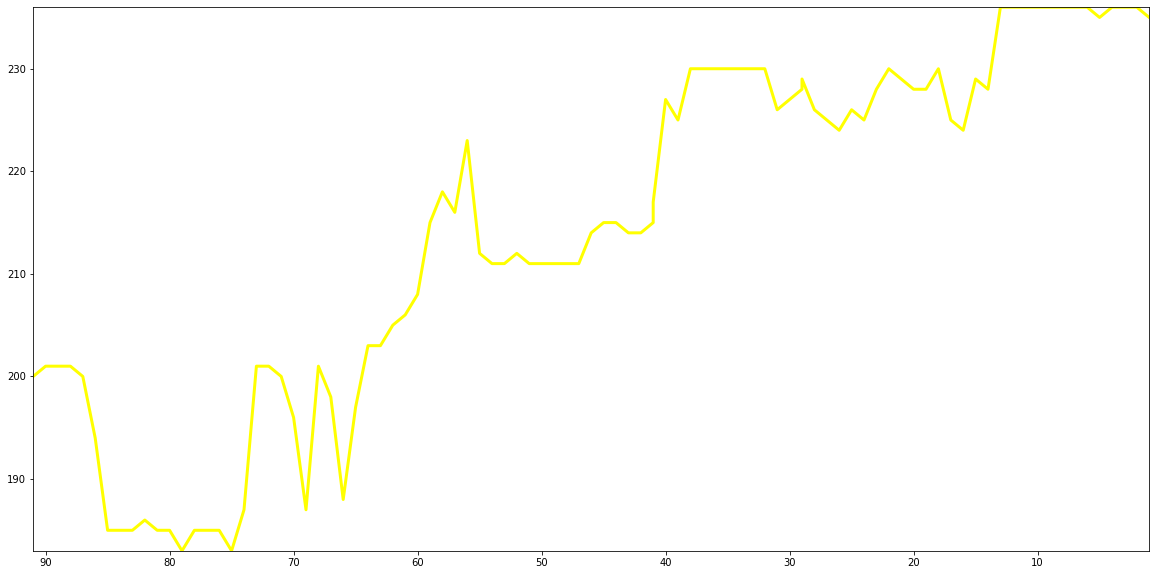

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(prediction['balls_left'],prediction['predicted_total'],color='yellow',linewidth=3)
plt.axis([max(prediction['balls_left']),min(prediction['balls_left']),min(prediction['predicted_total']),max(prediction['predicted_total'])])
#lt.invert_xaxis()

(91.0, 1.0, 193.0, 240.0)

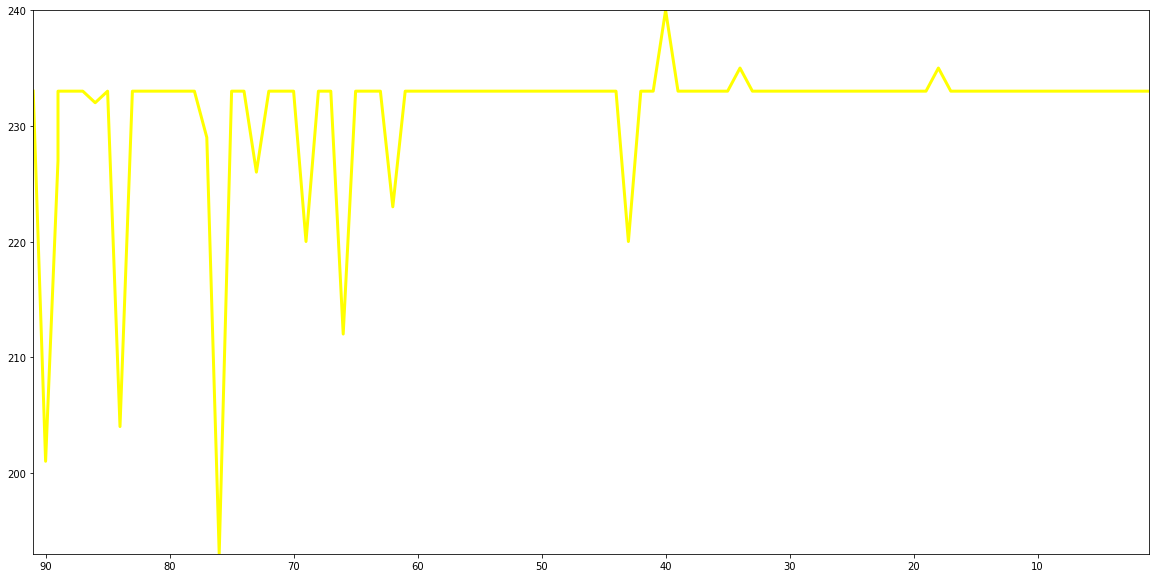

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(prediction['balls_left'],prediction['predicted_total'],color='yellow',linewidth=3)
plt.axis([max(prediction['balls_left']),min(prediction['balls_left']),min(prediction['predicted_total']),max(prediction['predicted_total'])])
#lt.invert_xaxis()
#plt.plot(prediction['end_of_over'],prediction['win'],color='#00a65a',linewidth=4)
#plt.plot(prediction['end_of_over'],prediction['last_five'],color='red',linewidth=4)
#plt.bar(prediction['last_five'],prediction['predicted_total'])
#plt.title('Target-' + str(target))


Text(0, 0.5, 'runs_predicted')

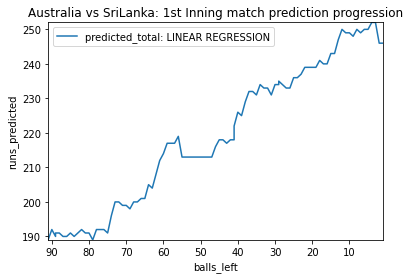

In [89]:
# gca stands for 'get current axis'
ax = plt.gca()

prediction.plot(kind='line',x='balls_left',y='predicted_total',ax=ax,label='predicted_total: LINEAR REGRESSION')
#prediction.plot(kind='line',x='last_five',y='predicted_total', color='red', ax=ax)
plt.axis([max(prediction['balls_left']),min(prediction['balls_left']),min(prediction['predicted_total']),max(prediction['predicted_total'])])
plt.legend()
plt.title('Australia vs SriLanka: 1st Inning match prediction progression')
plt.ylabel("runs_predicted")


Text(0, 0.5, 'runs_predicted')

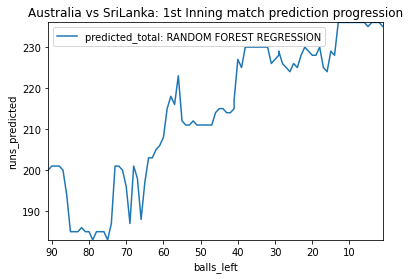

In [101]:
# gca stands for 'get current axis'
ax = plt.gca()

prediction.plot(kind='line',x='balls_left',y='predicted_total',ax=ax,label='predicted_total: RANDOM FOREST REGRESSION')
#prediction.plot(kind='line',x='last_five',y='predicted_total', color='red', ax=ax)
plt.axis([max(prediction['balls_left']),min(prediction['balls_left']),min(prediction['predicted_total']),max(prediction['predicted_total'])])
plt.legend()
plt.title('Australia vs SriLanka: 1st Inning match prediction progression')
plt.ylabel("runs_predicted")


Text(0, 0.5, 'runs_predicted')

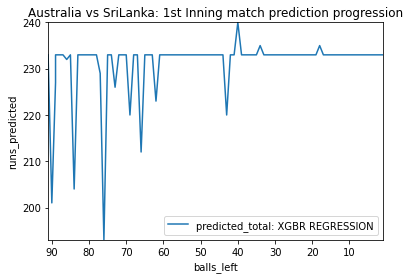

In [79]:
ax = plt.gca()

prediction.plot(kind='line',x='balls_left',y='predicted_total',ax=ax,label='predicted_total: XGBR REGRESSION')
#prediction.plot(kind='line',x='last_five',y='predicted_total', color='red', ax=ax)
plt.axis([max(prediction['balls_left']),min(prediction['balls_left']),min(prediction['predicted_total']),max(prediction['predicted_total'])])
plt.legend()
plt.title('Australia vs SriLanka: 1st Inning match prediction progression')
plt.ylabel("runs_predicted")


In [102]:
teams

['Australia',
 'South Africa',
 'India',
 'New Zealand',
 'West Indies',
 'Sri Lanka',
 'Afghanistan',
 'Bangladesh',
 'Ireland',
 'England',
 'Pakistan',
 'Zimbabwe']

In [103]:
final_q2['venue'].unique()

array(['SuperSport Park', 'New Wanderers Stadium', 'Newlands',
       'Vidarbha Cricket Association Stadium, Jamtha', 'Wankhede Stadium',
       'Eden Gardens', 'Himachal Pradesh Cricket Association Stadium',
       'M Chinnaswamy Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Feroz Shah Kotla', 'Pallekele International Cricket Stadium',
       'R Premadasa Stadium', 'Melbourne Cricket Ground',
       'Simonds Stadium, South Geelong', 'Adelaide Oval',
       'Harare Sports Club', 'McLean Park', 'Bay Oval', 'Eden Park',
       'The Rose Bowl', 'County Ground', 'Sophia Gardens',
       'Riverside Ground', 'Green Park',
       'Greater Noida Sports Complex Ground',
       'Central Broward Regional Park Stadium Turf Ground',
       'Dubai International Cricket Stadium', 'Sheikh Zayed Stadium',
       'Bellerive Oval', 'Westpac Stadium', 'Seddon Park',
       'Mangaung Oval', 'Senwes Park', 'Kensington Oval, Bridgetown',
       "Queen's Park Oval, Port of S

In [104]:
final_q3['venue'].unique()

array(['Dubai International Cricket Stadium', 'Eden Park',
       'Shere Bangla National Stadium, Mirpur', 'Westpac Stadium',
       'R Premadasa Stadium, Colombo', 'Hagley Oval', 'Eden Gardens',
       'Arun Jaitley Stadium', 'Wankhede Stadium',
       'R.Premadasa Stadium, Khettarama', 'Seddon Park',
       'Warner Park, St Kitts', 'Greater Noida Sports Complex Ground',
       'The Wanderers Stadium, Johannesburg', 'Manuka Oval, Canberra',
       'Sophia Gardens, Cardiff', 'Gaddafi Stadium',
       'Zahur Ahmed Chowdhury Stadium',
       'Pallekele International Cricket Stadium', 'Newlands', 'Bready',
       'Barabati Stadium', 'Feroz Shah Kotla', 'Sheikh Zayed Stadium',
       'Civil Service Cricket Club, Stormont, Belfast',
       'National Stadium, Karachi', 'Harare Sports Club',
       'Bready Cricket Club, Magheramason', 'Saxton Oval',
       'Kensington Oval, Bridgetown, Barbados', 'SuperSport Park',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Green Pa

In [105]:
#import pickle
#pickle.dump(pipe,open('Run_model.pkl','wb'))